In [1]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

data = np.load("datasets/OpenBCI_GUI-v5-meditation_filtered.npy")

# Frequência de amostragem dos dados
fs = 250 

# Número de canais nos dados
nchannels = 8 

# Número de pontos em cada segmento
nperseg = 1024

In [2]:
# Ajusta o comprimento dos dados para ser um múltiplo inteiro de nperseg
npts = data.shape[1]
nsegments = npts // nperseg
npts_adjusted = nsegments * nperseg
data = data[:, :npts_adjusted]

In [3]:
# Cria um array 3,4,5,6,7
theta = np.arange(3, 8)

# Cria um array 8,9,10,11,12
alpha = np.arange(8, 13)

# Cria um array 13,14,...,32
beta = np.arange(12, 33)

# Cria um array 25,26,...,99
gama = np.arange(25, 100)

# cria um array NumPy que contém 100 valores igualmente espaçados dentro do intervalo especificado entre 8 e 13, inclusive.
np.linspace(8, 13, 100)

# analisar dados no domínio da frequência e scipy.signal.welch

array([ 8.        ,  8.05050505,  8.1010101 ,  8.15151515,  8.2020202 ,
        8.25252525,  8.3030303 ,  8.35353535,  8.4040404 ,  8.45454545,
        8.50505051,  8.55555556,  8.60606061,  8.65656566,  8.70707071,
        8.75757576,  8.80808081,  8.85858586,  8.90909091,  8.95959596,
        9.01010101,  9.06060606,  9.11111111,  9.16161616,  9.21212121,
        9.26262626,  9.31313131,  9.36363636,  9.41414141,  9.46464646,
        9.51515152,  9.56565657,  9.61616162,  9.66666667,  9.71717172,
        9.76767677,  9.81818182,  9.86868687,  9.91919192,  9.96969697,
       10.02020202, 10.07070707, 10.12121212, 10.17171717, 10.22222222,
       10.27272727, 10.32323232, 10.37373737, 10.42424242, 10.47474747,
       10.52525253, 10.57575758, 10.62626263, 10.67676768, 10.72727273,
       10.77777778, 10.82828283, 10.87878788, 10.92929293, 10.97979798,
       11.03030303, 11.08080808, 11.13131313, 11.18181818, 11.23232323,
       11.28282828, 11.33333333, 11.38383838, 11.43434343, 11.48

In [4]:
# Calculando a PSD para cada canal
psds = []
for i in range(nchannels):
    f, psd = signal.welch(data[i, :], fs, nperseg=nperseg)
    psds.append(psd)

In [5]:
# Plota as PSDs
# fig, axs = plt.subplots(nchannels, 1, figsize=(8, 10))
# for i in range(nchannels):
#     axs[i].semilogy(f, psds[i])
#     axs[i].set_title(f"Canal {i+1}")
#     axs[i].set_xlabel("Frequência (Hz)")
#     axs[i].set_ylabel("Densidade Espectral de Potência (V^2/Hz)")
# plt.tight_layout()
# plt.show()

In [6]:
# Frequências correspondentes às bandas de frequência
freqs = f
theta_mask = np.logical_and(freqs >= theta[0], freqs <= theta[-1])
alpha_mask = np.logical_and(freqs >= alpha[0], freqs <= alpha[-1])
beta_mask = np.logical_and(freqs >= beta[0], freqs <= beta[-1])
gama_mask = np.logical_and(freqs >= gama[0], freqs <= gama[-1])

# Calcula a potência de cada banda de frequência para cada canal
theta_power = []
alpha_power = []
beta_power = []
gama_power = []

for i in range(nchannels):
    theta_power.append(np.trapz(psds[i][theta_mask], freqs[theta_mask]))
    alpha_power.append(np.trapz(psds[i][alpha_mask], freqs[alpha_mask]))
    beta_power.append(np.trapz(psds[i][beta_mask], freqs[beta_mask]))
    gama_power.append(np.trapz(psds[i][gama_mask], freqs[gama_mask]))

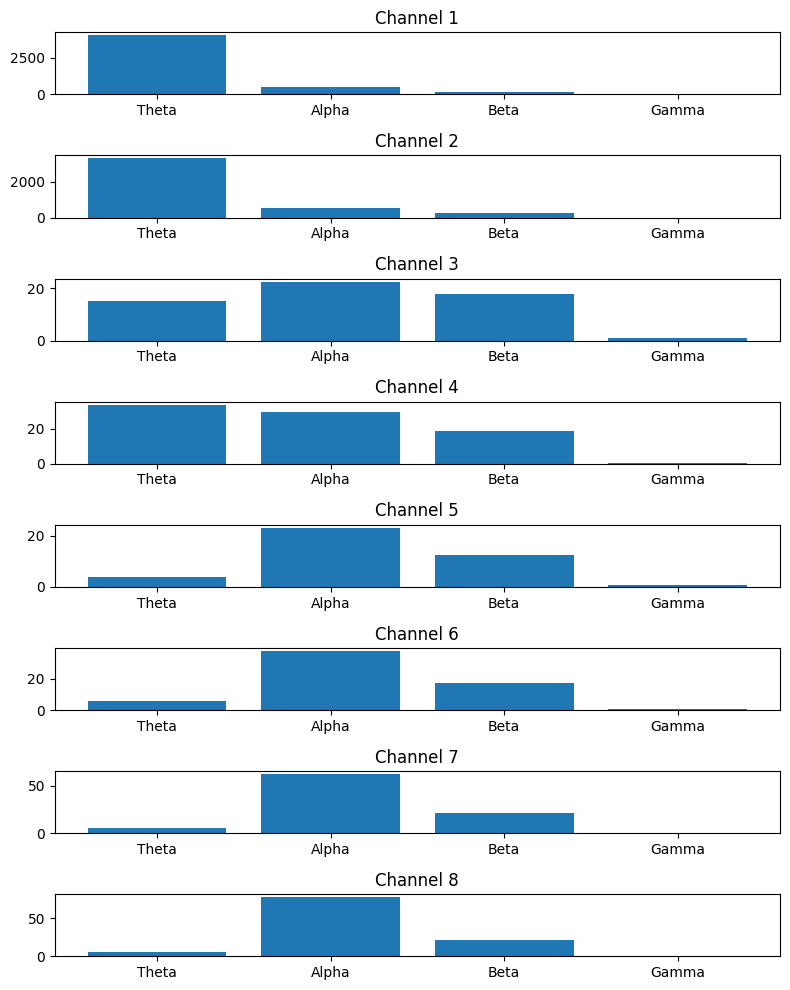

In [7]:
# Plota as potências de cada banda de frequência para cada canal
fig, axs = plt.subplots(nchannels, 1, figsize=(8, 10))
for i in range(nchannels):
    axs[i].bar(["Theta", "Alpha", "Beta", "Gamma"], [theta_power[i], alpha_power[i], beta_power[i], gama_power[i]])
    axs[i].set_title(f"Channel {i+1}")

plt.tight_layout()
plt.show()